### Gradient Descent Implementation

In [1]:
# Data taken from - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt 

In [2]:
# importing Data and Creating the Dataframe
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

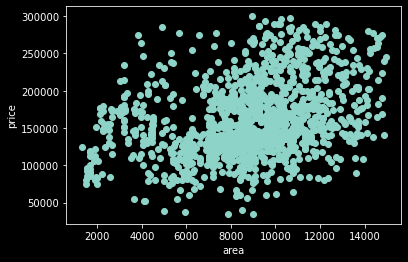

In [4]:
# We are intrested in finding a Linear Model that will detect the Price at which 
# the house will be sold at for a given Area
# According to the given data description in the data_description.txt we choose
#       Area  - LotArea Column - Independent Variable
#       Price - SalePrice - Dependent Variable

df_area_price = df[['LotArea','SalePrice']]
df_area_price = df_area_price.rename(columns={'LotArea':'area', 'SalePrice':'price'})
# Removing Ouliers - I don't know the actual procedure that is followed I just selected the range that has maximum data points 
df_area_price = df_area_price[df_area_price['area'] < 15000]
df_area_price = df_area_price[df_area_price['price'] < 300000]
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df_area_price['area'], df_area_price['price'])


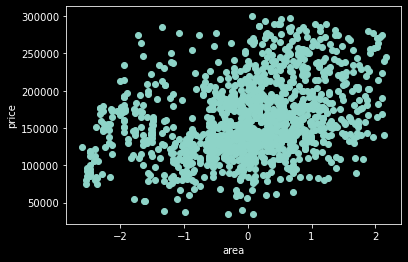

In [5]:
# Plotting the given data as a Scatter Plot
from sklearn.preprocessing import StandardScaler
df_area = df_area_price.drop('price', axis='columns')
df_price = df_area_price.drop('area', axis='columns')
# Performing Scaling b/c Gradient Descent can't converge easily for the given data
scaler = StandardScaler()
scaler.fit(df_area_price)
df_area = scaler.fit_transform(df_area)
# Not Sure if the Target Attribute is Scaled or not
# df_price = scaler.fit_transform(df_price)
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df_area, df_price)


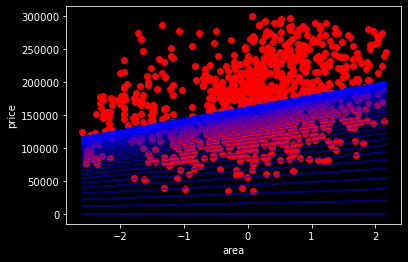

In [6]:
# We will use Linear Regression as a Linear Model using the Gradient Descent Algorithm to find
# value of m and b

# Gradent Descent
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def gradient_descent(X, Y, learning_rate=0.05, iterations=10000):
    theta0 = 0
    theta1 = 0	
    cost_function = 0
    theta0_log = []
    theta1_log = []
    cost_function_log = []
    m = len(X)
    for i in range(iterations):
        hypothesis = theta0 + theta1*X
        theta0_new = theta0 - learning_rate*(-2/m)*sum(Y - hypothesis)
        theta1_new = theta1 - learning_rate*(-2/m)*sum(X*(Y - hypothesis))
        theta0 = theta0_new
        theta1 = theta1_new
        plt.plot(X, hypothesis, alpha=0.5, color="b")
        cost_function = mean_squared_error(Y, hypothesis)
        theta0_log.append(theta0)
        theta1_log.append(theta1)
        cost_function_log.append(cost_function)
    return {"theta0": theta0, "theta1": theta1, "cost_function": cost_function, "theta0_log": theta0_log, "theta1_log": theta1_log, "cost_function_log": cost_function_log}


gradient_descent_dictionary = gradient_descent(
    df_area, df_price.to_numpy())
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df_area, df_price , color="r")


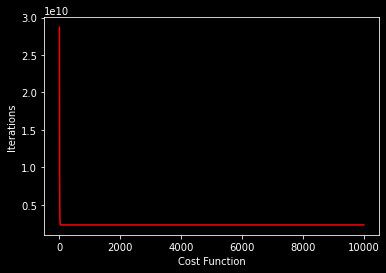

In [7]:
# The Cost Function Againsts the number of iterations 
# We can see the cost_function converges 
cost_function_log = gradient_descent_dictionary['cost_function_log']
plt.xlabel("Cost Function")
plt.ylabel("Iterations")
plt.plot(range(len(cost_function_log)),cost_function_log,color="red")


Intercept and Slope from scikit library function
b :  [161504.83146067] 
m : [[17652.49188605]]

Intercept and Slope from gradient_descent function that we wrote
b :  [161504.83146067] 
m :  [17652.49188605]


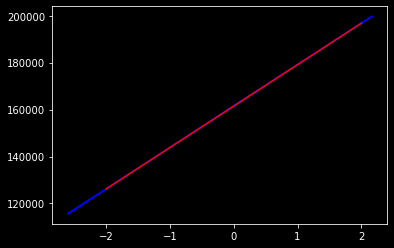

In [8]:
model = linear_model.LinearRegression()
model.fit(df_area, df_price)
print("Intercept and Slope from scikit library function")
print("b : ",model.intercept_,"\nm :", model.coef_)
print("\nIntercept and Slope from gradient_descent function that we wrote")
print("b : ", gradient_descent_dictionary["theta0"],"\nm : ", gradient_descent_dictionary["theta1"])
plt.plot(df_area, model.predict(df_area),color='b')
x = np.linspace(-2,2)
plt.plot(x,gradient_descent_dictionary["theta0"] +  x*gradient_descent_dictionary["theta1"], color="red" )